1 - Primeiro vamos Criar duas figuras, uma representrar a tespetade perfeita da estatistica, ela dado X um parametro, ele tem uma influencia direta em Y, de uma forma tão direta, que supera o P-Value de 0.05, outro e um grupo de numeros aleatorios, esse segundo grupo tem a finalidade de vermos com o P-Value, a inclinação de reta se comportam nesses casos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Configuração para garantir reprodutibilidade e estilo
np.random.seed(42)

# --- GERAÇÃO DOS DADOS ---

# Caso 1: Correlação Perfeita (0,0 até 8,8 -> 9 pontos)
# "Reta que vai de 0,0 até N,N onde pontos estão exatamente onde a reta passa"
x1 = np.arange(9)
y1 = x1  # y é igual a x

# Caso 2: Aleatório / Sem Correlação
# "Dados gerados aleatoriamente com distribuição uniforme no mesmo intervalo"
x2 = np.arange(9)
y2 = np.random.uniform(low=0, high=8, size=9) 

# --- ANÁLISE E PLOTAGEM ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Função auxiliar para processar e plotar cada caso
def analisar_plotar(ax, x, y, titulo):
    # 1. Regressão Linear (linregress)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Cria a linha da reta baseada nos dados encontrados
    linha_regressao = slope * x + intercept
    
    # 2. Covariância
    # np.cov retorna uma matriz. A covariância entre x e y está na posição [0,1]
    covariancia = np.cov(x, y)[0, 1]

    # Plotagem
    ax.scatter(x, y, color='blue', s=100, label='Dados (9 pontos)')
    ax.plot(x, linha_regressao, color='red', linestyle='--', linewidth=2, label=f'Reta: y={slope:.2f}x + {intercept:.2f}')
    
    # Configurações do Gráfico
    ax.set_title(titulo, fontsize=14, weight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(-1, 9)
    ax.set_ylim(-1, 9)
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.legend()
    
    # Exibindo Estatísticas no Gráfico
    texto_stats = (
        f"Slope (Declive): {slope:.4f}\n"
        f"R-squared: {r_value**2:.4f}\n"
        f"P-value: {p_value:.4e}\n"
        f"Covariância: {covariancia:.4f}"
    )
    # Coloca uma caixa de texto com os dados
    ax.text(0.05, 0.95, texto_stats, transform=ax.transAxes, fontsize=11,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    return p_value, covariancia, slope

# Executa para o Gráfico 1
p1, cov1, m1 = analisar_plotar(ax1, x1, y1, "Caso 1: Correlação Perfeita")

# Executa para o Gráfico 2
p2, cov2, m2 = analisar_plotar(ax2, x2, y2, "Caso 2: Distribuição Aleatória")

plt.tight_layout()
plt.show()


print(f"FIGURA 1 (Perfeita):")
print(f" > P-value: {p1:.4e}, Covariância: {cov1:.4f}, Reta: Inclinação de {m1:.1f}")
print("\n")
print(f"FIGURA 2 (Aleatória):")
print(f" > P-value: {p2:.4f}, Covariância: {cov2:.4f}, Reta: Inclinação de {m2:.2f}. ")

Como podemos analisar na figura Figura 1, o P-Value é praticamente zero, oque nos mostra que esses dados estão alinhados de mais para serem coincidência, a Covariância indica o quanto alterar o valor A influencia em B, já a inclinação, vai nos indicar que essa variação é positiva, A aumenta com o crescimento de B. Já no outro caso, nós vemos um típico caso de não influência, pois os pontos são gerados aleatoriamente, sem que A tenha relação com B o P-Value se mostra bem auto, A Covariância, mostra que a alteração de A, pouco afeta B, com e a inclinação é quase paralela ao eixo x

 2 - Vejamos aqui uma estatistica extraida por mim que se asemelha muito a uma distribuição normal, esses dados foram tidados do numero de pedaços de linguiça que acompanha a feijoada no restaurante univercitario quando almocei com amigos, a partir desta analise podemos tirar nosso niveis de confiança, claro que devido ao, baixo numero de dados, numeros absurdos podem aparecer , o jeito que ultilizei para representar o numero foi, a posição da lista mostra o numero de pedaços, quando ao valor na posição mostra quantas pessoas tiraram aquele numero de pedaços "L[X] = N pessoas, X = pedaços"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

contagem = [0, 1, 1, 3, 2, 1]
amostra_feijoada = []

for pedacos, frequencia in enumerate(contagem):
    amostra_feijoada.extend([pedacos] * frequencia)

amostra_feijoada = np.array(amostra_feijoada)

# --- CÁLCULO DE ESTATÍSTICAS ---
media = np.mean(amostra_feijoada)
desvio_padrao = np.std(amostra_feijoada, ddof=1)  # ddof=1 para amostra
n = len(amostra_feijoada)
erro_padrao = desvio_padrao / np.sqrt(n)

print(f"Média da amostra: {media:.4f} pedaços")
print(f"Desvio padrão: {desvio_padrao:.4f}")
print(f"Tamanho da amostra (n): {n}")
print(f"Erro padrão: {erro_padrao:.4f}")
print()

# --- CÁLCULO DOS INTERVALOS DE CONFIANÇA ---
niveis_confianca = [90, 95, 99]
intervalos = {}

print("INTERVALOS DE CONFIANÇA:")

for nivel in niveis_confianca:
    # Nível de significância (alpha)
    alpha = 1 - (nivel / 100)
    
    # Valor crítico t (usando distribuição t de Student)
    t_critico = stats.t.ppf(1 - alpha / 2, df=n-1)
    
    # Margem de erro
    margem_erro = t_critico * erro_padrao
    
    # Intervalo de confiança
    limite_inferior = media - margem_erro
    limite_superior = media + margem_erro
    
    intervalos[nivel] = {
        'limite_inf': limite_inferior,
        'limite_sup': limite_superior,
        'margem_erro': margem_erro,
        't_critico': t_critico
    }
    
    print(f"\n{nivel}% de Confiança:")
    print(f"  t crítico: {t_critico:.4f}")
    print(f"  Margem de erro: ±{margem_erro:.4f}")
    print(f"  Intervalo: [{limite_inferior:.4f}, {limite_superior:.4f}]")



Média da amostra: 3.1250 pedaços
Desvio padrão: 1.2464
Tamanho da amostra (n): 8
Erro padrão: 0.4407

INTERVALOS DE CONFIANÇA:
------------------------------------------------------------

90% de Confiança:
  t crítico: 1.8946
  Margem de erro: ±0.8349
  Intervalo: [2.2901, 3.9599]

95% de Confiança:
  t crítico: 2.3646
  Margem de erro: ±1.0420
  Intervalo: [2.0830, 4.1670]

99% de Confiança:
  t crítico: 3.4995
  Margem de erro: ±1.5421
  Intervalo: [1.5829, 4.6671]


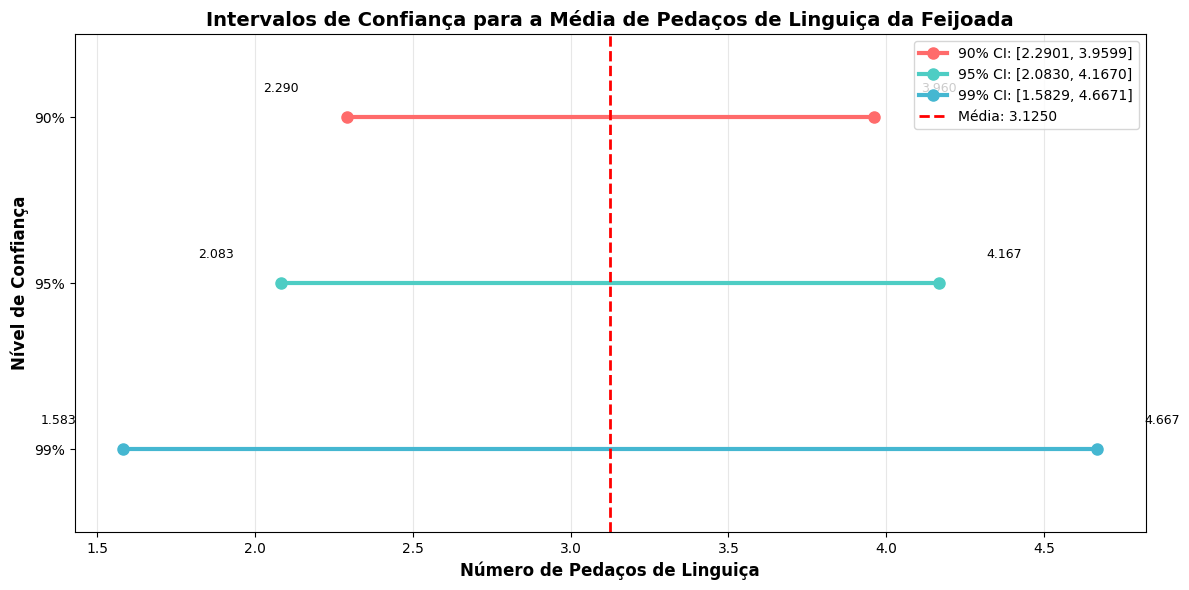


Gráfico exibido: Visualização dos Intervalos de Confiança


In [ ]:

fig, ax = plt.subplots(figsize=(12, 6))

# Cores para cada intervalo
cores = ['#FF6B6B', '#4ECDC4', '#45B7D1']
y_positions = [3, 2, 1]

# Plotar cada intervalo de confiança
for idx, (nivel, y_pos) in enumerate(zip(niveis_confianca, y_positions)):
    inf = intervalos[nivel]['limite_inf']
    sup = intervalos[nivel]['limite_sup']
    
    # Desenhar a linha do intervalo
    ax.plot([inf, sup], [y_pos, y_pos], 'o-', linewidth=3, markersize=8, 
            color=cores[idx], label=f'{nivel}% CI: [{inf:.4f}, {sup:.4f}]')
    
    # Adicionar os valores dos limites na linha
    ax.text(inf - 0.15, y_pos + 0.15, f'{inf:.3f}', fontsize=9, ha='right')
    ax.text(sup + 0.15, y_pos + 0.15, f'{sup:.3f}', fontsize=9, ha='left')

# Plotar a média
ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: {media:.4f}')

# Configurações do gráfico
ax.set_ylim(0.5, 3.5)
ax.set_xlabel('Número de Pedaços de Linguiça', fontsize=12, weight='bold')
ax.set_ylabel('Nível de Confiança', fontsize=12, weight='bold')
ax.set_title('Intervalos de Confiança para a Média de Pedaços de Linguiça da Feijoada', 
             fontsize=14, weight='bold')
ax.set_yticks(y_positions)
ax.set_yticklabels([f'{nivel}%' for nivel in niveis_confianca])
ax.grid(True, alpha=0.3, axis='x')
ax.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


3 - Para Essa questão iremos analisar a ipotese de que os jogadores de futebol asiaticos são mais baixos que a média, como grupo de controle estou ultilizando o Manchester City, pois possui jogadores europeus, sulamericanos, africanos e asiaticos, para ser o grupo de analise pesquisei um time da liga japonesa o Urawa Red. vamos ver como foi.

In [2]:
import numpy as np
from scipy.stats import ttest_ind

# --- 1. PREPARAÇÃO DOS DADOS ---
# Dados brutos extraídos das etapas anteriores
raw_city = ['1.88 m', '1.88 m', '1.8 m', '1.83 m', '1.8 m', '1.85 m', '1.85 m', '1.93 m', '1.85 m', '1.7 m', '1.78 m', '1.78 m', '1.8 m', '1.88 m', '1.91 m', '1.73 m', '1.83 m', '1.78 m', '1.83 m', '1.7 m', '1.75 m', '1.8 m', '1.83 m', '1.96 m', '1.73 m', '1.78 m', '1.85 m', '1.75 m', '1.83 m']
raw_japao = ['1.85 m', '1.83 m', '1.7 m', '1.83 m', '1.75 m', '1.83 m', '1.8 m', '1.8 m', '1.75 m', '1.65 m', '1.88 m', '1.75 m', '1.68 m', '1.7 m', '1.8 m', '1.7 m', '1.75 m', '1.63 m', '1.8 m', '1.7 m', '1.78 m', '1.78 m', '1.7 m', '1.83 m', '1.78 m', '1.73 m', '1.91 m']

# Limpeza: Tirar o ' m' e converter para número (float)
grupo_city = [float(h.replace(' m', '')) for h in raw_city]
grupo_japao = [float(h.replace(' m', '')) for h in raw_japao]

# --- 2. ESTATÍSTICAS BÁSICAS ---
media_city = np.mean(grupo_city)
media_japao = np.mean(grupo_japao)

print(f"Média de altura Manchester City: {media_city:.2f} m")
print(f"Média de altura Time Japonês:  {media_japao:.2f} m")
print(f"Diferença visual: {media_city - media_japao:.2f} m (aprox. 5 cm)")
print("-" * 30)

# --- 3. TESTE T (O Tira-Teima) ---
# H0 (Nula): As médias são iguais.
# H1 (Alternativa): As médias são diferentes.
# alpha (Nível de significância): 0.05

t_stat, p_value = ttest_ind(grupo_city, grupo_japao)

print(f"Estatística T (força da diferença): {t_stat:.4f}")
print(f"P-Valor (probabilidade de ser sorte): {p_value:.8f}") # 8 casas decimais para ver bem

print("-" * 30)
# --- 4. INTERPRETAÇÃO AUTOMÁTICA ---
alpha = 0.05

if p_value < alpha:
    print("✅ RESULTADO: Rejeitamos a Hipótese Nula.")
    print("Conclusão: Existe uma diferença estatisticamente significativa.")
    if media_city > media_japao:
        print("A estatística confirma: O time Inglês é MAIS ALTO.")
    else:
        print("A estatística confirma: O time Japonês é MAIS ALTO.")
else:
    print("❌ RESULTADO: Não podemos rejeitar a Hipótese Nula.")
    print("Conclusão: A diferença observada pode ser apenas acaso. Estatisticamente são iguais.")

Média de altura Manchester City: 1.82 m
Média de altura Time Japonês:  1.77 m
Diferença visual: 0.05 m (aprox. 5 cm)
------------------------------
Estatística T (força da diferença): 2.7826
P-Valor (probabilidade de ser sorte): 0.00741416
------------------------------
✅ RESULTADO: Rejeitamos a Hipótese Nula.
Conclusão: Existe uma diferença estatisticamente significativa.
A estatística confirma: O time Inglês é MAIS ALTO.


4 - agora vamos analisar o codigo enviado e explicar seu funcinamento.

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Aqui podemos ver as condições do teste, ele se repetira 10 mil vezes, as listas teram uma media de 50 e um desvio padrão de 10
num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10
significance_level = 0.05 # Usar valores diferentes

#Variavel de reconrrência
significant_results = 0

#Aqui podemos ver o teste sendo executado
for _ in range(num_simulations):
    
    #criação de duas listas com a distribuição gaussiana
    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)

    #Aqui iremos compara as duas listas, e extrair o quão seus dados são possiveis de pertecerem ao mesmo grupo
    t_stat, p_value = ttest_ind(group1, group2)


    #Toda vez que o conjuntos da Lista B lista do experiemnto, forem distintos da lista A(Controle) a ponto de superar o significance_level
    # anotamos esse caso
    if p_value < significance_level:
        significant_results += 1

#aqui tiraremos uma estatistica, para medir em porcentagens
proportion_significant = significant_results / num_simulations


print(f"Number of simulations: {num_simulations}")
print(f"Significance level (alpha): {significance_level}")
print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")

Ao analisar o codigo a cima, é mostra a porcentagem de vezes que o P-Value entre os dois conjuntos de dados, é maior que o numero que estabelecemos na variavel significance_leve, ou seja, o numero de vezes que a diferença entre os dois conjuntos de dados, é tão significante, que o p value é menor que esse valor, Claro que para isso esse valor deve variar de 1 a 0

5 - gora vamos analisar os dados coletados no slide, esse grupo de dados mostrara 50 dados dos batimentos cardiacos de mulheres, ele não nos dá os dados na integra, porem nos da numeros importantes como, a média o desvio padrão e tambem o qual a possibilidade de mulheres terem mais de 100 batimentos, com isso podemos construir uma base de dados que se assemelhe a usada, e um grafico para ilustrar melhor.

--- LISTA DE DADOS GERADA (50 Mulheres) ---
[ 75.7  71.7  76.6  82.1  71.1  71.1  82.4  77.4  69.7  76.   69.7  69.7
  74.1  60.7  61.9  69.1  66.3  74.6  67.   63.8  81.7  71.2  73.   63.7
  69.2  73.3  65.4  74.9  68.9  70.8  68.9  84.1  72.5  66.   77.7  65.
  73.9  60.4  64.3  73.8  77.2  73.7  71.9  70.7 106.2 108.1 108.8 112.5
 110.8 105.5]
------------------------------
Média Amostral: 75.9
IC Média (95%): 72.1 até 79.7
Proporção Amostral: 0.120
IC Proporção (95%): 0.030 até 0.210


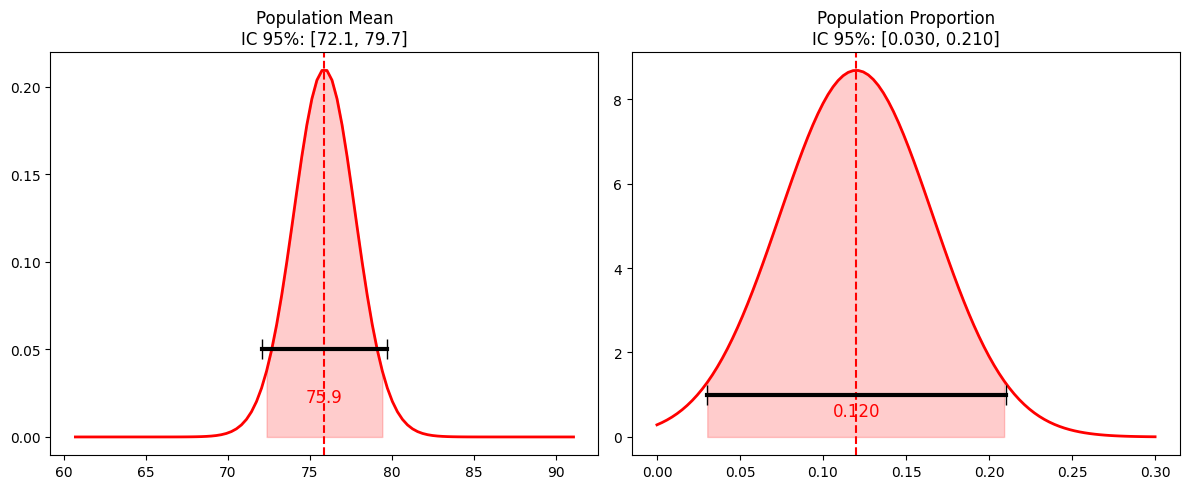

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# --- 1. GERANDO OS DADOS (Engenharia Reversa) ---
# O objetivo é criar uma lista de 50 números que resulte na média 75.9
np.random.seed(42) # Semente para garantir que você tenha o mesmo resultado que eu

n = 50
target_mean = 75.9
# O desvio padrão foi calculado para bater com o intervalo [72.1, 79.7]
target_std = 13.37 

# Geramos 44 mulheres com batimento "normal" e 6 com "alto" (para dar 12%)
normal_group = np.random.normal(72, 5, 44)
high_group = np.random.normal(102, 2, 6)
data = np.concatenate([normal_group, high_group])

# Ajuste Matemático Fino:
# Forçamos os números a terem EXATAMENTE a média e desvio padrão do slide
current_mean = np.mean(data)
current_std = np.std(data, ddof=1)
data = (data - current_mean) / current_std * target_std + target_mean

# Arredondando para parecer dados reais de frequencia cardiaca
data = np.round(data, 1)

print("--- LISTA DE DADOS GERADA (50 Mulheres) ---")
print(data)
print("-" * 30)

# --- 2. CÁLCULOS ESTATÍSTICOS ---

# LADO ESQUERDO: Intervalo para a Média (T-Student)
# x_barra +/- t * (s / raiz(n))
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
dof = n - 1 # Graus de liberdade
t_crit = stats.t.ppf(0.975, dof) # 95% de confiança (bicaudal)

error_margin_mean = t_crit * (sample_std / np.sqrt(n))
ci_mean = (sample_mean - error_margin_mean, sample_mean + error_margin_mean)

# LADO DIREITO: Intervalo para Proporção (Normal Z)
# p +/- z * raiz(p*(1-p)/n)
count_high = np.sum(data >= 100) # Deve ser aprox 6
p_hat = count_high / n
z_crit = stats.norm.ppf(0.975) # 1.96

error_margin_prop = z_crit * np.sqrt((p_hat * (1 - p_hat)) / n)
ci_prop = (p_hat - error_margin_prop, p_hat + error_margin_prop)

print(f"Média Amostral: {sample_mean:.1f}")
print(f"IC Média (95%): {ci_mean[0]:.1f} até {ci_mean[1]:.1f}")
print(f"Proporção Amostral: {p_hat:.3f}")
print(f"IC Proporção (95%): {ci_prop[0]:.3f} até {ci_prop[1]:.3f}")

# --- 3. PLOTAGEM DOS GRÁFICOS ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Média
x = np.linspace(sample_mean - 4*error_margin_mean, sample_mean + 4*error_margin_mean, 100)
y = stats.t.pdf(x, dof, sample_mean, sample_std/np.sqrt(n))
ax1.plot(x, y, 'r-', lw=2)
ax1.fill_between(x, y, where=(x >= ci_mean[0]) & (x <= ci_mean[1]), color='red', alpha=0.2)
ax1.set_title(f"Population Mean\nIC 95%: [{ci_mean[0]:.1f}, {ci_mean[1]:.1f}]")
ax1.axvline(sample_mean, color='red', linestyle='--')
# Linhas pretas do intervalo
ax1.plot([ci_mean[0], ci_mean[1]], [0.05, 0.05], color='black', lw=3, marker='|', markersize=15)
ax1.text(sample_mean, 0.02, f"{sample_mean:.1f}", ha='center', color='red', fontsize=12)

# Gráfico 2: Proporção
x2 = np.linspace(0, 0.3, 100)
y2 = stats.norm.pdf(x2, p_hat, error_margin_prop/1.96) # Usando erro padrão estimado
ax2.plot(x2, y2, 'r-', lw=2)
ax2.fill_between(x2, y2, where=(x2 >= ci_prop[0]) & (x2 <= ci_prop[1]), color='red', alpha=0.2)
ax2.set_title(f"Population Proportion\nIC 95%: [{ci_prop[0]:.3f}, {ci_prop[1]:.3f}]")
ax2.axvline(p_hat, color='red', linestyle='--')
# Linhas pretas do intervalo
ax2.plot([ci_prop[0], ci_prop[1]], [1, 1], color='black', lw=3, marker='|', markersize=15)
ax2.text(p_hat, 0.5, f"{p_hat:.3f}", ha='center', color='red', fontsize=12)

plt.tight_layout()
plt.savefig('intervals_reproduction.png')

A apartir desses dados, temos 95% de certeza que a media esta entre 72.1 e 79.7, mas não podemos confundir e achar que esse intervalo tambem serve para nos dizer que 95% das amostras esta nele, pois como podemos ver serca de 12% das mulheres tem mais de 100 BPM

6- o objetivo dessa questão é apartir de um conjunto de dados, gerar uma reta onde Y = 0.1+ 0.78x analisando os dados minha estimativa é de que as cordenadas são x = [1.0, 1.8, 3.4, 3.6, 4.7, 5.0, 5.5, 5.7, 6.2] e y = [1.3, 2.5, 0.9, 3.3, 3.1, 2.8, 5.3, 4.7, 6.2] essas cordenadas dão uma reta um pouco alterada, 

Equação obtida (Scikit-learn): y = 0.11 + 0.79x

--- Resumo Estatístico (Statsmodels) ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     12.34
Date:                Tue, 03 Feb 2026   Prob (F-statistic):            0.00982
Time:                        11:10:24   Log-Likelihood:                -12.802
No. Observations:                   9   AIC:                             29.60
Df Residuals:                       7   BIC:                             30.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

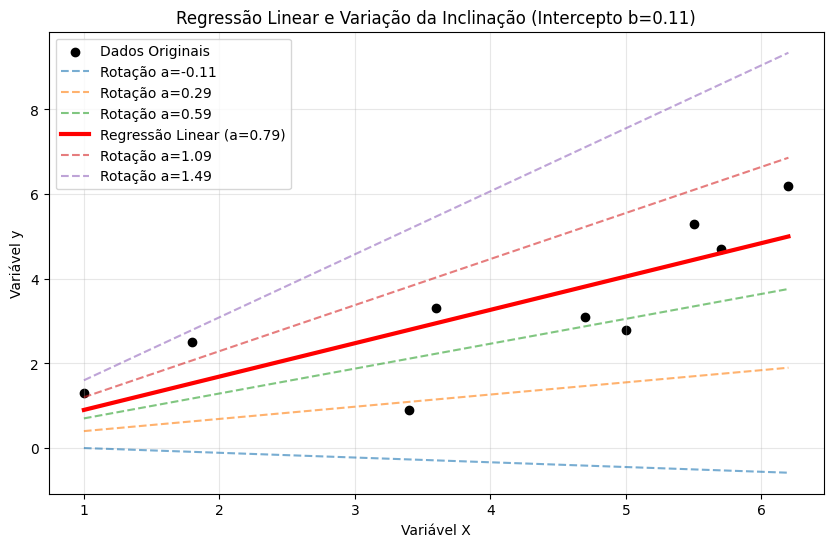

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


X = np.array([1.0, 1.8, 3.4, 3.6, 4.7, 5.0, 5.5, 5.7, 6.2]).reshape(-1, 1)
y = np.array([1.3, 2.5, 0.9, 3.3, 3.1, 2.8, 5.3, 4.7, 6.2])

# 2. Linear Regression com scikit-learn
modelo = LinearRegression()
modelo.fit(X, y)

# Obtendo os coeficientes (b = intercepto, a = inclinação)
b_sklearn = modelo.intercept_
a_sklearn = modelo.coef_[0]

print(f"Equação obtida (Scikit-learn): y = {b_sklearn:.2f} + {a_sklearn:.2f}x")

# 3. Estatísticas com statsmodels
# É necessário adicionar uma constante para o statsmodels calcular o intercepto (b)
X_sm = sm.add_constant(X) 
modelo_sm = sm.OLS(y, X_sm).fit()

print("\n--- Resumo Estatístico (Statsmodels) ---")
print(modelo_sm.summary())

# 4. Plotagem Gráfica com Variação de Rotação
plt.figure(figsize=(10, 6))

# Plotar os pontos originais (Scatter plot)
plt.scatter(X, y, color='black', label='Dados Originais')

# Definir 6 valores diferentes para 'a' (inclinação) para mostrar a rotação
# Usamos o 'a' encontrado pelo modelo como centro e variamos ao redor dele
as_variados = [a_sklearn - 0.9, a_sklearn - 0.5, a_sklearn - 0.2, 
               a_sklearn,       # A reta da regressão linear (ótima)
               a_sklearn + 0.3, a_sklearn + 0.7]

x_range = np.linspace(min(X), max(X), 100)

# Loop para plotar as 6 retas
for i, a in enumerate(as_variados):
    # Equação da reta: y = b + ax (usamos o b fixo do modelo para rotacionar no eixo)
    y_pred = b_sklearn + a * x_range
    
    if a == a_sklearn:
        # Destacar a reta da regressão linear (a melhor)
        plt.plot(x_range, y_pred, color='red', linewidth=3, label=f'Regressão Linear (a={a:.2f})')
    else:
        # Outras retas rotacionadas
        plt.plot(x_range, y_pred, linestyle='--', alpha=0.6, label=f'Rotação a={a:.2f}')

# Configurações do gráfico
plt.title(f'Regressão Linear e Variação da Inclinação (Intercepto b={b_sklearn:.2f})')
plt.xlabel('Variável X')
plt.ylabel('Variável y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

A partir da regreção linear dos dados tivemos um resultado satisfatorio para A onde seu valor ficou em torno de 0.79 oque nos deixa apenas 4 centesimos dos 0.75 propostos pela figura